# **Here we are trying to understand out dataset through Visualisation:**

# *Importing Customly Created DataSet from Roboflow*

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WNU93LLN8FUCGoH7qUcd")
project = rf.workspace("varun-qlsfy").project("table-detection-gomjy")
version = project.version(10)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Table-Detection-10 in yolov8:: 100%|██████████| 3434/3434 [00:00<00:00, 3863.23it/s]


In [2]:
import os
target_root="/content/Table-Detection-10"

# *Following code shows how many images are available for each split*

In [3]:
def count_images(dataset_folder):
    image_counts = {}
    for split in ["train", "test", "valid"]:
        image_folder = os.path.join(dataset_folder, split, "images")
        if os.path.exists(image_folder):
            num_images = len([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))])
            image_counts[split] = num_images
        else:
            image_counts[split] = 0
    return image_counts

image_counts = count_images(target_root)

for split, count in image_counts.items():
    print(f"📂 {split}/images: {count} images")

📂 train/images: 1196 images
📂 test/images: 342 images
📂 valid/images: 173 images


# *Following code is for Class Distribution (Training, testing and Validation)*

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from collections import Counter

# Path to dataset.yaml
yaml_path = "/content/Table-Detection-10/data.yaml"

# Load class names from dataset.yaml
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)
class_names = data["names"]  # Dictionary {0: "occupied", 1: "unoccupied_clean", ...}

In [5]:
# Function to count class occurrences in label files
def count_classes(label_dir):
    class_counts = Counter()

    # Read all .txt label files
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            with open(os.path.join(label_dir, label_file), "r") as f:
                for line in f:
                    class_id = int(line.split()[0])
                    class_counts[class_id] += 1

    return class_counts

In [6]:
# Count classes in train, valid, and test sets
train_counts = count_classes("/content/Table-Detection-10/test/labels")
valid_counts = count_classes("/content/Table-Detection-10/valid/labels")
test_counts = count_classes("/content/Table-Detection-10/train/labels")

# Convert to dictionary with class names
train_counts_named = {class_names[k]: v for k, v in train_counts.items()}
valid_counts_named = {class_names[k]: v for k, v in valid_counts.items()}
test_counts_named = {class_names[k]: v for k, v in test_counts.items()}

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


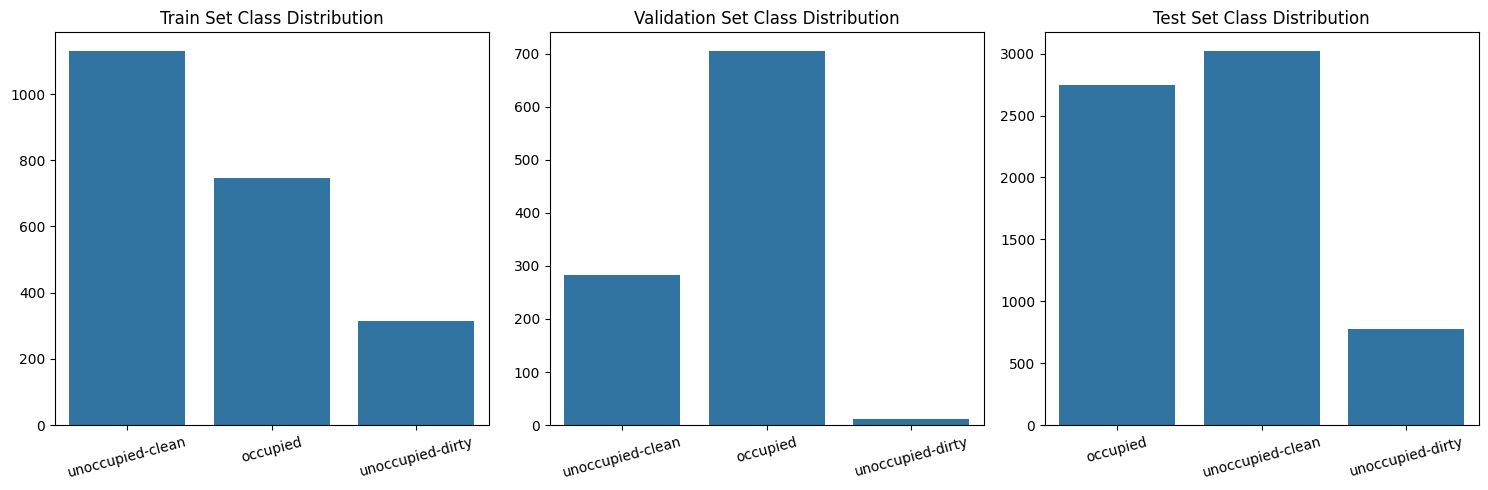

In [7]:
# Plot the distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=list(train_counts_named.keys()), y=list(train_counts_named.values()), ax=axes[0])
axes[0].set_title("Train Set Class Distribution")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=15)

sns.barplot(x=list(valid_counts_named.keys()), y=list(valid_counts_named.values()), ax=axes[1])
axes[1].set_title("Validation Set Class Distribution")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)

sns.barplot(x=list(test_counts_named.keys()), y=list(test_counts_named.values()), ax=axes[2])
axes[2].set_title("Test Set Class Distribution")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=15)

plt.tight_layout()
plt.show()

# *Sample Images from the Dataset*

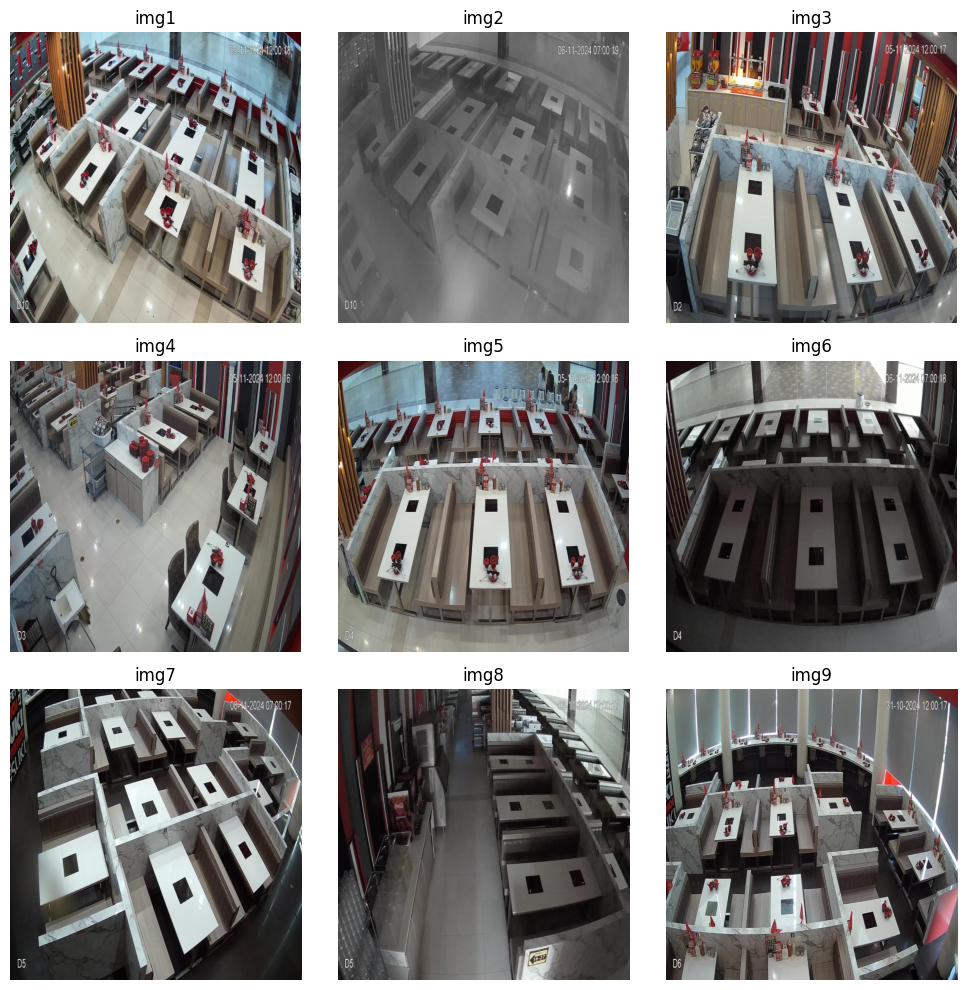

In [8]:
import matplotlib.pyplot as plt
import cv2
import os

image_dir = '/content/Table-Detection-10/train/images'
sample_files = sorted(os.listdir(image_dir))[:9]  # pick first 9 images

plt.figure(figsize=(10, 10))
for i, img_file in enumerate(sample_files):
    img = cv2.imread(os.path.join(image_dir, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f'img{i + 1}')  # just labeling for visualization
    plt.axis('off')

plt.tight_layout()
plt.show()

# *Check for Missing or Extra YOLO Label Files in Train/Test/Val*

In [12]:
import os

# Root directory where all your sets are stored
base_dir = '/content/Table-Detection-10'  # e.g., "dataset/"

# Subfolders for each set
sets = ['train', 'test', 'valid']

def check_labels(set_name):
    print(f"\n📁 Checking {set_name.upper()} set...")

    image_dir = os.path.join(base_dir, set_name, 'images')
    label_dir = os.path.join(base_dir, set_name, 'labels')

    image_files = [os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))]
    label_files = [os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')]

    image_set = set(image_files)
    label_set = set(label_files)

    missing_labels = image_set - label_set
    extra_labels = label_set - image_set

    print(f"🖼️  Total images: {len(image_set)}")
    print(f"🏷️  Total labels: {len(label_set)}")

    if missing_labels:
        print(f"❌ Missing labels for {len(missing_labels)} images:")
        for name in sorted(missing_labels):
            print(f"  - {name}.jpg")
    else:
        print("✅ All images have labels.")

    if extra_labels:
        print(f"⚠️ Extra labels without matching images: {len(extra_labels)}")
        for name in sorted(extra_labels):
            print(f"  - {name}.txt")
    else:
        print("✅ No extra labels.")

# Run the check for each set
for s in sets:
    check_labels(s)


📁 Checking TRAIN set...
🖼️  Total images: 1196
🏷️  Total labels: 1196
✅ All images have labels.
✅ No extra labels.

📁 Checking TEST set...
🖼️  Total images: 342
🏷️  Total labels: 342
✅ All images have labels.
✅ No extra labels.

📁 Checking VALID set...
🖼️  Total images: 173
🏷️  Total labels: 173
✅ All images have labels.
✅ No extra labels.


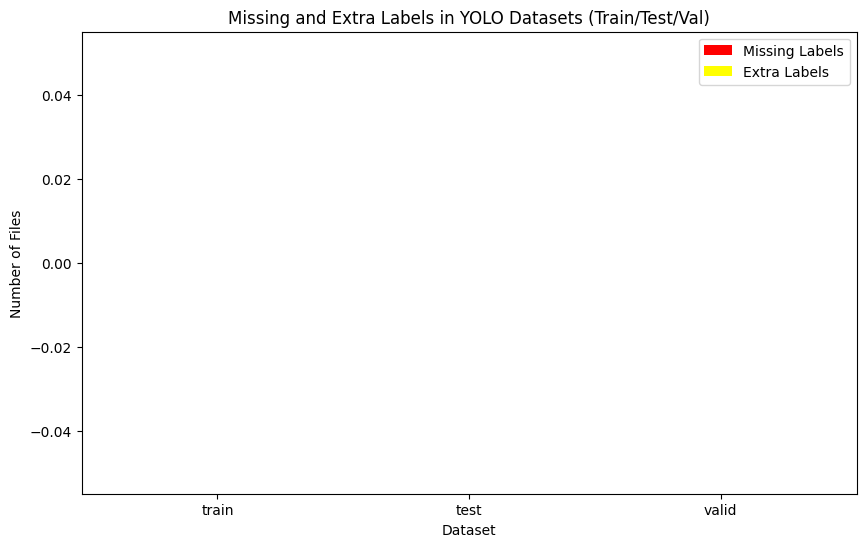

In [14]:
import matplotlib.pyplot as plt
import os

# Base directory for dataset
base_dir = '/content/Table-Detection-10'  # Replace with your actual path
sets = ['train', 'test', 'valid']

# Track the missing and extra labels
missing_counts = []
extra_counts = []

def check_labels(set_name):
    image_dir = os.path.join(base_dir, set_name, 'images')
    label_dir = os.path.join(base_dir, set_name, 'labels')

    # List of image files and label files
    image_files = [os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))]
    label_files = [os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')]

    image_set = set(image_files)
    label_set = set(label_files)

    # Find missing and extra labels
    missing_labels = image_set - label_set
    extra_labels = label_set - image_set

    missing_counts.append(len(missing_labels))
    extra_counts.append(len(extra_labels))

# Check for all sets
for s in sets:
    check_labels(s)

# Create a stacked bar plot to show missing and extra labels per set
plt.figure(figsize=(10, 6))
plt.bar(sets, missing_counts, label='Missing Labels', color='red')
plt.bar(sets, extra_counts, bottom=missing_counts, label='Extra Labels', color='yellow')

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('Number of Files')
plt.title('Missing and Extra Labels in YOLO Datasets (Train/Test/Val)')
plt.legend()
plt.show()